In [5]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

In [3]:
# Caminho para os diretórios
train_dir = "C:/Users/andre/Documents/Faculdade/Mestrado/1ano_1sem/VC/project/data/train/"
test_dir = "C:/Users/andre/Documents/Faculdade/Mestrado/1ano_1sem/VC/project/data/test/"

In [4]:
# Função para contar imagens por classe
def count_images(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Contagem de imagens
train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

print("Imagens de treino por classe:", train_counts)
print("Imagens de teste por classe:", test_counts)

Imagens de treino por classe: {'angry': 3995, 'disgust': 436, 'fear': 4097, 'happy': 7215, 'neutral': 4965, 'sad': 4830, 'surprise': 3171}
Imagens de teste por classe: {'angry': 958, 'disgust': 111, 'fear': 1024, 'happy': 1774, 'neutral': 1233, 'sad': 1247, 'surprise': 831}


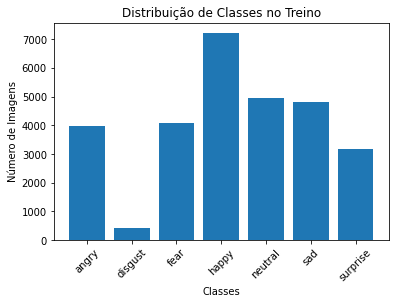

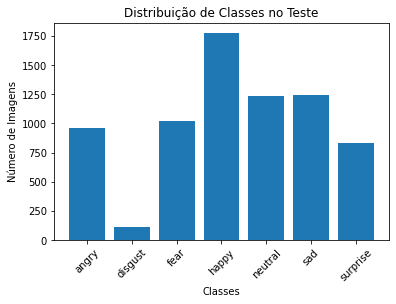

In [6]:
plt.bar(train_counts.keys(), train_counts.values())
plt.title("Distribuição de Classes no Treino")
plt.xlabel("Classes")
plt.ylabel("Número de Imagens")
plt.xticks(rotation=45)
plt.show()

plt.bar(test_counts.keys(), test_counts.values())
plt.title("Distribuição de Classes no Teste")
plt.xlabel("Classes")
plt.ylabel("Número de Imagens")
plt.xticks(rotation=45)
plt.show()

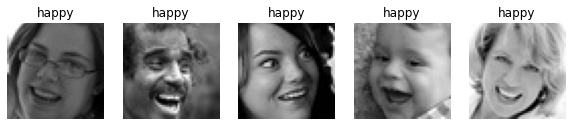

In [8]:
def show_sample_images(directory, class_name, num_samples=5):
    class_path = os.path.join(directory, class_name)
    image_files = os.listdir(class_path)[:num_samples]
    
    plt.figure(figsize=(10, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(class_name)
        plt.axis("off")
    plt.show()

show_sample_images(train_dir, "happy")

In [11]:
# Verificar dimensões de algumas imagens
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        img_path = os.path.join(class_path, os.listdir(class_path)[0])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        print(f"Classe: {class_name}, Dimensão: {img.shape}")
        break

Classe: angry, Dimensão: (48, 48)


In [12]:
# Verificar valores de pixel para possível normalização
img_example = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
print(f"Valores mínimos e máximos de pixel: {img_example.min()}, {img_example.max()}")

Valores mínimos e máximos de pixel: 3, 197


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Configurações gerais
img_size = (48, 48)  # Resolução das imagens
batch_size = 32

# Geradores de dados para treino e teste
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, rotation_range=10)
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    "C:/Users/andre/Documents/Faculdade/Mestrado/1ano_1sem/VC/project/data/train",
    target_size=img_size,
    color_mode="grayscale",  # As imagens estão em escala de cinza
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    "C:/Users/andre/Documents/Faculdade/Mestrado/1ano_1sem/VC/project/data/test",
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical"
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')  # Saída baseada no número de classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    steps_per_epoch=len(train_generator),
    validation_steps=len(test_generator)
)

Epoch 1/20


898/898 [==============================] - 592s 655ms/step - loss: 1.7022 - accuracy: 0.3204 - val_loss: 1.5043 - val_accuracy: 0.4196
Epoch 2/20
898/898 [==============================] - 79s 88ms/step - loss: 1.5325 - accuracy: 0.4054 - val_loss: 1.4060 - val_accuracy: 0.4635
Epoch 3/20
898/898 [==============================] - 78s 86ms/step - loss: 1.4674 - accuracy: 0.4323 - val_loss: 1.3527 - val_accuracy: 0.4836
Epoch 4/20
898/898 [==============================] - 77s 86ms/step - loss: 1.4284 - accuracy: 0.4470 - val_loss: 1.3278 - val_accuracy: 0.4908
Epoch 5/20
898/898 [==============================] - 78s 86ms/step - loss: 1.3971 - accuracy: 0.4667 - val_loss: 1.2929 - val_accuracy: 0.4996
Epoch 6/20
898/898 [==============================] - 78s 87ms/step - loss: 1.3765 - accuracy: 0.4681 - val_loss: 1.2938 - val_accuracy: 0.5024
Epoch 7/20
898/898 [==============================] - 78s 86ms/step - loss: 1.3489 - accuracy: 0.4825 - val_loss: 1.2672 - val_accur

225/225 [==============================] - 9s 39ms/step - loss: 1.1746 - accuracy: 0.5476
Acurracy nos dados de teste: 54.76%


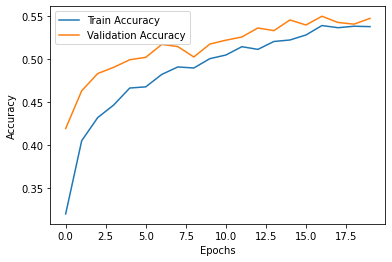

In [16]:
# Avaliação do modelo
loss, accuracy = model.evaluate(test_generator)
print(f"Acurracy nos dados de teste: {accuracy * 100:.2f}%")

# Curvas de treinamento
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()